In [164]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [165]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D  #2Dfigure (word vector:1D)
from keras.utils import np_utils #Transfer numbers to 1D vectors ex: 1>>[0,1,0,0,0,0,0,0,0]
from keras.optimizers import Adam #maybe SGD, GD, Adadelta .etc 
import keras.callbacks

# ---Load training/testing data from Mnist---

http://yann.lecun.com/exdb/mnist/

In [166]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()
#Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [167]:
print(
"Scale of x0_train:",x0_train.shape,"\n", 
"Scale of y0_train:",y0_train.shape,"\n",
"Scale of x0_test:",x0_test.shape,"\n",     
"Scale of y0_test:",y0_test.shape,"\n",
) #Check the dimensions of your input datasets.

Scale of x0_train: (60000, 28, 28) 
 Scale of y0_train: (60000,) 
 Scale of x0_test: (10000, 28, 28) 
 Scale of y0_test: (10000,) 



In [168]:
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255
x_test = x_test / 255

In [169]:
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)

In [170]:
print(
"Scale of x_train:",x_train.shape,"\n", 
"Scale of y_train:",y_train.shape,"\n",
"Scale of x_test:",x_test.shape,"\n",     
"Scale of y_test:",y_test.shape,"\n",
)  #Check the dimensions of your training datasets.

Scale of x_train: (60000, 28, 28, 1) 
 Scale of y_train: (60000, 10) 
 Scale of x_test: (10000, 28, 28, 1) 
 Scale of y_test: (10000, 10) 



In [171]:
print(y0_test[2])

1


# ---Modeling---

In [187]:
model = Sequential()
N_F=15 #Number of Filters
N_C=3  #Dims of Filters
N_MP=2 #Dims of MaxPooling
N_N=200 #Number of Neurals
N_CA=10 #Number of catergories

In [188]:
model.add(Conv2D(N_F, (N_C, N_C), padding='same', input_shape=(28,28,1)))  #some diff between Theano & Tensorflow
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [189]:
model.add(Conv2D(N_F, (N_C, N_C)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [190]:
model.add(Conv2D(N_F, (N_C, N_C)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [191]:
model.add(Flatten())
model.add(Dense(N_N))
model.add(Activation('relu'))

In [192]:
model.add(Dense(N_CA))
model.add(Activation('softmax'))

# ---Start to compile n learn this CNN---


In [193]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
model.summary() #to check ur NN structure

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 15)        150       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 15)        2040      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 15)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 15)          2040      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 60)                0         
__________

In [194]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=12,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
 3328/54000 [>.............................] - ETA: 34s - loss: 2.0943 - acc: 0.4138 

KeyboardInterrupt: 

In [ ]:
result = model.predict_classes(x_test)  ##These are the predictions after training

In [ ]:
score = model.evaluate(x_test, y_test)  #####這裡數字出問題
loss, acc = score

In [ ]:
print("loss=",loss)
print("accuracy=",acc)

### Plot and some test after training

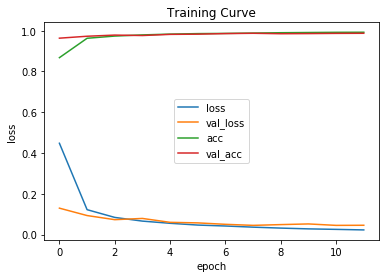

In [20]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.title('Training Curve')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['loss','val_loss', 'acc','val_acc'], loc='center')  
plt.show()

In [21]:
print (hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [35]:
# Check which items we got right / wrong
correct_indices = np.nonzero(result == y0_test)[0]
incorrect_indices = np.nonzero(result != y0_test)[0]
print(np.array(incorrect_indices).ndim)
print(incorrect_indices) ##incorrect_indices,correct_indices are 2 arrays
np.array(incorrect_indices).shape

1
[  18  175  247  259  358  445  449  582  659  684  726  740  881  938  947
  965 1014 1039 1112 1156 1166 1181 1182 1226 1232 1247 1260 1299 1319 1337
 1364 1709 1716 1790 1809 1878 1901 1903 1965 1982 2004 2035 2043 2109 2135
 2189 2326 2414 2422 2454 2462 2532 2597 2607 2654 2758 2896 2921 2939 2995
 3030 3073 3130 3218 3222 3225 3251 3254 3333 3344 3422 3451 3490 3520 3534
 3550 3559 3688 3727 3762 3767 3808 3838 3853 3976 3985 4007 4027 4044 4063
 4065 4176 4199 4256 4289 4369 4400 4536 4571 4639 4671 4699 4740 4807 4808
 4823 4838 4990 5449 5634 5654 5745 5752 5936 5937 5955 5973 6023 6555 6571
 6576 6597 6632 6651 6755 6847 7216 7265 7552 7574 8059 8065 8079 8094 8095
 8102 8246 8316 8408 8520 8527 9009 9015 9019 9036 9158 9530 9587 9620 9634
 9664 9679 9692 9700 9726 9729 9745 9792 9883 9888]


(160,)

Prediction: 1 
 Answer: 7 
 Index: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


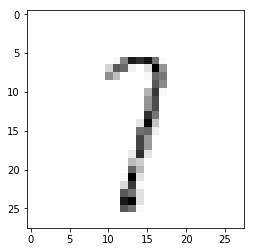

In [151]:
wrong=175
print("Prediction:",result[wrong],"\n","Answer:",y0_test[wrong],"\n","Index:",y_test[wrong])
plt.imshow(x0_test[wrong], cmap='Greys')

# ---END--- 

# ---Let's try to identify these hand-written numbers---

In [24]:
pick = np.random.randint(1,10,25)

In [25]:
x0_test.shape

(10000, 28, 28)

### Correct

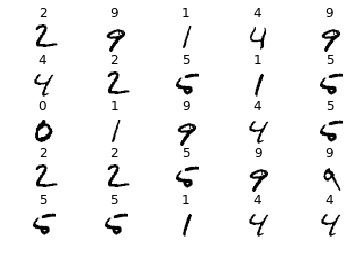

In [26]:
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(result[pick[i]])
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.axis("off")

### Incorrect

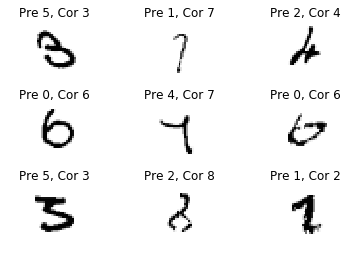

In [149]:
#plt.figure()
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x0_test[incorrect], cmap='Greys', interpolation='none')
    plt.title("Pre {}, Cor {}".format(result[incorrect], y0_test[incorrect])) #Predict, Correct
    plt.axis("off")

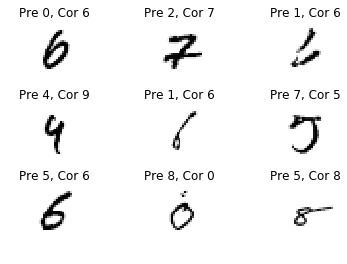

In [150]:
pick1 = np.random.randint(0,160,9)
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x0_test[incorrect_indices[pick1[i]]], cmap='Greys', interpolation='none')
    plt.title("Pre {}, Cor {}".format(result[incorrect_indices[pick1[i]]], y0_test[incorrect_indices[pick1[i]]])) #Predict, Correct
    #plt.title(y0_test[pick[i]]result[pick1[i]])
    plt.axis("off")